<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Baseball-Run-Values-from-Regression" data-toc-modified-id="Baseball-Run-Values-from-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Baseball Run Values from Regression</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Our-first-regression-model" data-toc-modified-id="Our-first-regression-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Our first regression model</a></span></li><li><span><a href="#Are-Ks-more-costly-than-other-outs?" data-toc-modified-id="Are-Ks-more-costly-than-other-outs?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Are Ks more costly than other outs?</a></span></li><li><span><a href="#What-happens-if-we-only-use-a-year-of-data?" data-toc-modified-id="What-happens-if-we-only-use-a-year-of-data?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>What happens if we only use a year of data?</a></span></li></ul></li><li><span><a href="#Four-Factor-Model" data-toc-modified-id="Four-Factor-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Four Factor Model</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Four-Factors-and-Winning-Pct" data-toc-modified-id="Four-Factors-and-Winning-Pct-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Four Factors and Winning Pct</a></span></li><li><span><a href="#Four-Factors-and-the-log-Rating-Ratio" data-toc-modified-id="Four-Factors-and-the-log-Rating-Ratio-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Four Factors and the log Rating Ratio</a></span></li><li><span><a href="#By-Games" data-toc-modified-id="By-Games-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>By Games</a></span></li></ul></li><li><span><a href="#Real-Plus/Minus" data-toc-modified-id="Real-Plus/Minus-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Real Plus/Minus</a></span><ul class="toc-item"><li><span><a href="#Stint-data" data-toc-modified-id="Stint-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Stint data</a></span></li><li><span><a href="#Stint-Data-for-Regression" data-toc-modified-id="Stint-Data-for-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Stint Data for Regression</a></span></li><li><span><a href="#Penalizing-the-Least-Squares-Fit" data-toc-modified-id="Penalizing-the-Least-Squares-Fit-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Penalizing the Least Squares Fit</a></span></li><li><span><a href="#How-penalizing-the-coefficients-cleans-things-up" data-toc-modified-id="How-penalizing-the-coefficients-cleans-things-up-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>How penalizing the coefficients cleans things up</a></span></li><li><span><a href="#Compare-to-ESPN's-RPM" data-toc-modified-id="Compare-to-ESPN's-RPM-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Compare to ESPN's RPM</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

from regression_helper import multiple_regression

## Baseball Run Values from Regression

+ We can reinterpret linear weights as a regression
+ Before, we directly computed the run values from play-by-play data
+ Now, we use season data to infer the impact of events and obtain a run value

+ Multiple regression and least squares


### Load Data

+ Similar to what we've seen, but cleaned a bit for ease of use with our helper function

In [2]:
# Load lahman_teams.csv obtained from the lahman_main databank. 
# This table is a slight modification of the regular table.
lahman = pd.read_csv("lahman_teams.csv")

# Restrict to after the year 2000
lahman_2000s = lahman.loc[lahman['yearID'] >= 2000]
lahman_2000s.head()

,yearID,franchID,RAA,O,O_nonK,SO,X1B,X2B,X3B,HR,BB,HBP,SB,CS
982,2000,ANA,181.600705,4054,3030.0,1024.0,995,309,34,236,608,47.0,93.0,52.0
983,2000,ARI,109.600705,4061,3086.0,975.0,961,282,44,179,535,59.0,97.0,44.0
984,2000,ATL,127.600705,3999,2989.0,1010.0,1011,274,26,179,595,59.0,148.0,56.0
985,2000,BAL,111.600705,4041,3141.0,900.0,992,310,22,184,558,49.0,126.0,65.0
986,2000,BOS,109.600705,4127,3108.0,1019.0,988,316,32,167,611,42.0,43.0,30.0


### Our first regression model

+ Let's determine the fit of our regression model

+ Results: hey, this looks pretty good.  Compare that to what we computed in a previous notebook:

Event_Type
Out    -0.287
1B      0.462
2B      0.781
3B      1.085
HR      1.383
BB      0.306
HBP     0.336

+ Run values for SB/CS: .2, -(2 * run_per_out + 0.075) (so about -.4)


K      -0.292

In [3]:
dep_vars = 'RAA'
ind_vars = ['O', 'X1B', 'X2B', 'X3B', 'HR', 'BB', 'HBP', 'SB', 'CS']
coefs, predictions, errors = multiple_regression(dep_vars, ind_vars, lahman_2000s)
coefs

O     -0.259851
X1B    0.479376
X2B    0.744706
X3B    1.078258
HR     1.436029
BB     0.288419
HBP    0.335237
SB     0.182543
CS    -0.372263
dtype: float64

### Are Ks more costly than other outs?

+ Is there much of a distinction between regular outs and Ks?
+ Evidence is not strong

In [4]:
ind_vars_with_K = ['O_nonK', 'SO', 'X1B', 'X2B', 'X3B', 'HR', 'BB', 'HBP', 'SB', 'CS']
coefs_with_K, _, _ = multiple_regression(dep_vars, ind_vars_with_K, lahman_2000s)
coefs_with_K

O_nonK   -0.248914
SO       -0.268120
X1B       0.457801
X2B       0.733130
X3B       1.095368
HR        1.438783
BB        0.288666
HBP       0.335617
SB        0.187726
CS       -0.391668
dtype: float64

### What happens if we only use a year of data?

The value of a double is way off.  HBP and BB are out of whack too.  And most alarmingly, CS is now not a negative

What happened?  Not enough data.  One year has only 30 team seasons and we just tried to estimate 9 coeffients.  30 data points would be okay if we wanted to measure 1 effect.  But 9 simultaneous effects?  No way.

The play-by-play method worked for a single season but the regression requires multiple years.  This is not great if we want to capture changing run environments.  Solution (if we wanted to continue regression modelling) would be to build a regression using play-by-play data.  That would be enough data.

In [5]:
lahman_2016 = lahman.loc[lahman['yearID'] == 2016]
coefs_2016, _, _ = multiple_regression(dep_vars, ind_vars, lahman_2016)
coefs_2016

O     -0.251029
X1B    0.388503
X2B    1.132619
X3B    0.816812
HR     1.316626
BB     0.187916
HBP    0.533701
SB     0.135256
CS     0.014569
dtype: float64

## Four Factor Model

+ Recall the four factor model for basketball
+ 4 fundamental components of the game
+ Dean Oliver ranked the relative importance as 40%, 25%, 20%, 15%
+ Where did he get those values?  Are they the best?

+ Well, we don't know where he got those values but we can see what regression says for the relative importance

### Load Data

+ Similar data but cleaned up to have the four factors
+ rtg_rat and log_rtg_rat

In [6]:
nba_teams_full = pd.read_csv('team_season_ff_data.csv')

nba_teams = nba_teams_full.loc[nba_teams_full.season >= 2000]
nba_teams.head()

,team,season,win_pct,rtg_rat,log_rtg_rat,eFG,Tov,Reb,Ftr
516,ORL,2000,0.524390,1.010774,0.010716,0.380505,-1.299623,-0.374888,-2.114058
517,OKC,2000,0.536585,1.000000,0.000000,0.083395,0.241673,-0.335741,0.544216
518,UTA,2000,0.646341,1.050781,0.049534,0.876757,-0.388508,1.107366,-0.801943
519,CHI,2000,0.182927,0.905871,-0.098858,-1.824042,0.602356,-1.022925,-0.950757
520,CLE,2000,0.365854,0.956149,-0.044842,-0.652338,0.958817,0.290324,-0.252797


### Four Factors and Winning Pct

+ Need an intercept term

In [7]:
dep_vars = 'win_pct'
ind_vars = ['eFG', 'Tov', 'Reb', 'Ftr']
coefs, _, _ = multiple_regression(dep_vars, ind_vars, nba_teams, constant=True)
coefs

Intercept    0.500057
eFG          0.122653
Tov         -0.058226
Reb          0.039497
Ftr          0.034653
dtype: float64

+ Rescale the coefficients to sum to 100 (so they are now relative percentages (negative sign is irrelevant))

+ We got reasonably close. Tov Reb and FTR give up importance in favor of eFG

In [8]:
factor_coefs = coefs['eFG':]
factor_coefs / factor_coefs.abs().sum() * 100

eFG    48.093889
Tov   -22.831246
Reb    15.487149
Ftr    13.587717
dtype: float64

### Four Factors and the log Rating Ratio

No need for an intercept for the log rating ratio (very close to 0)

+ Similar results for the relative importance.  eFG is more relevant according to the regression

In [9]:
dep_vars = 'log_rtg_rat'
coefs, _, _ = multiple_regression(dep_vars, ind_vars, nba_teams)
coefs = coefs / coefs.abs().sum()
coefs

eFG    0.476750
Tov   -0.229748
Reb    0.161694
Ftr    0.131809
dtype: float64

### By Games

+ The four factor model was effective for games but just had more variation.  The regression should still be more effective.  How does that play out here?


In [10]:
games = pd.read_csv('game_ff_data_2016.csv')
games.head()

,GAME_ID,TEAM_NAME,OPP_TEAM_NAME,log_rtg_rat,eFG,Tov,Reb,Ftr
0,21600001,Knicks,Cavaliers,-0.231130,-1.392594,0.751141,-0.344226,0.335651
1,21600002,Jazz,Trail Blazers,-0.128505,-0.760523,0.071183,-0.015786,-0.676140
2,21600003,Spurs,Warriors,0.239358,0.318357,-0.448785,2.341258,0.536404
3,21600004,Magic,Heat,-0.091060,-0.967581,-0.148804,-0.576067,1.315323
4,21600005,Pacers,Mavericks,0.079820,0.438232,0.191175,-0.199326,1.660617


for 2016, weight is just a bit more on eFG.  Appears generally consistent with season level.

In [11]:
dep_vars = 'log_rtg_rat'
coefs, _, _ = multiple_regression(dep_vars, ind_vars, games)
coefs = coefs / coefs.abs().sum()
coefs

eFG    0.496854
Tov   -0.220977
Reb    0.191796
Ftr    0.090373
dtype: float64

## Real Plus/Minus

+ Plus/Minus
    + Define the raw version
+ How do think of this as a regression model?
    + simultaenous impacts on scoring by players
    + Linear equation model
+ The data:
    + From play-by-play, collect lineup stints
    + Compute performance over the time period where same 10 plyyers were on the court
    + Collect all these over a season (about 40k total stints)
+ The result:
    + A player's positive or negative (or 0) effect on net rating (so per 100 possesions)
    + Can construct lineup net ratings

+ ESPN's real plus/minus: show example of output
    + Overall RPM
    + Also ORPM and DRPM (breakup stints into offense and defense and have two effects for each player)
    + Convert to Wins (presumably using pythagorean expectation formula)
    + Looks pretty cool, we can get a nice measure of impact from 

### Stint data

Here we can see the data on all the stints but this isn't really effective for performing a regression analysis.  

In [12]:
from regression_helper import multiple_regression_big

df = pd.read_csv('nba_stints_2015_full.csv.gz')
print(df.shape)
df.head()

(40453, 13)


,away,away_ortg,away_poss,away_pts,away_unit,home,home_ortg,home_poss,home_pts,home_unit,net_poss,home_netpts,home_netrtg
0,Warriors,100.0,4,4,"['Stephen Curry', 'Klay Thompson', 'Andre Iguo...",Lakers,275.0,4,11,"['Ronnie Price', 'Wayne Ellington', 'Wesley Jo...",8,7,175.0
1,Kings,NaN,0,0,"['Ray McCallum', 'Ben McLemore', 'Nik Stauskas...",Nets,0.0,1,0,"['Jarrett Jack', 'Alan Anderson', 'Joe Johnson...",1,0,0.0
2,Warriors,170.0,10,17,"['Stephen Curry', 'Klay Thompson', 'Harrison B...",Lakers,90.0,10,9,"['Ronnie Price', 'Wayne Ellington', 'Wesley Jo...",20,-8,-80.0
3,Warriors,0.0,2,0,"['Stephen Curry', 'Klay Thompson', 'Harrison B...",Lakers,200.0,3,6,"['Ronnie Price', 'Wayne Ellington', 'Wesley Jo...",5,6,200.0
4,Warriors,100.0,1,1,"['Stephen Curry', 'Klay Thompson', 'Harrison B...",Lakers,NaN,0,2,"['Ronnie Price', 'Wayne Ellington', 'Wesley Jo...",1,1,-100.0


### Stint Data for Regression

Now we have something we can use.  Each lineup is encoded as 0-1.  If a player is on the court during a stint, they have a 1.

HCA stands for home court advantage.  It is actually just a vector of 1s.  This is like fitting an intercept.

In [13]:
stints = pd.read_csv('nba_stints_2015_binary.csv.gz')
players = list(stints.columns[3:])

stints.head()

,net_rtg,net_poss,HCA,A.J. Price,Aaron Brooks,Aaron Gordon,Adreian Payne,Al Horford,Al Jefferson,Al-Farouq Aminu,...,Will Barton,Will Bynum,Will Cherry,Willie Green,Wilson Chandler,Xavier Henry,Zach LaVine,Zach Randolph,Zaza Pachulia,Zoran Dragic
0,175.0,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-80.0,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,200.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-100.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We need a more advanced solver for the regression model that can handle this much bigger problem.  This is where `multiple_regression_big` comes in.

We compute the regression model.  We can see some of the results that come out for the first ten players alphabetically.

In [14]:
ind_vars = ['HCA'] + players
apm = multiple_regression_big('net_rtg', ind_vars, stints, weights='net_poss')
apm.head(10)

A.J. Price        -13.157560
Aaron Brooks       -2.429854
Aaron Gordon      -14.688712
Adreian Payne     -20.732361
Al Horford         -9.465314
Al Jefferson      -15.851161
Al-Farouq Aminu    -1.818711
Alan Anderson      -3.359995
Alec Burks        -15.805193
Alex Kirk         -57.585697
dtype: float64

Let's take a look at the histogram plot.

This is odd... there are some very large values.  This is supposed to be the player's impact on net rating and there are values over 100 in magnitude??

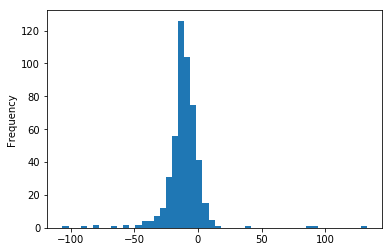

In [15]:
apm.plot.hist(bins=50)

Geez, who are some of these guys?  Where's Lebron??

What happened?

In [16]:
apm_HCA = apm['HCA']
print("Home Court Advantage for Net Rating: {:.2f}".format(apm_HCA))
print()
print("Top 20 by APM\n" + 40*"=")
print(apm[players].sort_values(ascending=False)[:20].to_string())
print()
print("Bottom 20 by APM\n" + 40*"=")
print(apm[players].sort_values(ascending=True)[:20].to_string())

Home Court Advantage for Net Rating: 2.56

Top 20 by APM
Jerrelle Benimon      132.576264
Malcolm Lee            93.616436
Sim Bhullar            85.079525
Eric Moreland          38.696007
Toure' Murry           13.305698
Lucas Nogueira         12.653926
Sean Kilpatrick        12.114689
David Stockton         10.261257
Stephen Curry           8.394628
C.J. Wilcox             8.290789
Cory Jefferson          6.650653
Russ Smith              6.561828
Xavier Henry            6.152980
Quincy Miller           5.741163
James Harden            5.598064
Glenn Robinson III      5.164508
Devyn Marble            5.029127
Kawhi Leonard           4.960071
Ricky Rubio             4.284679
Derrick Rose            4.274820

Bottom 20 by APM
Julius Randle         -106.443050
Bruno Caboclo          -89.190773
David Wear             -80.808367
Kalin Lucas            -78.895234
Mike Malone            -66.356134
Alex Kirk              -57.585697
Patrick Christopher    -56.450373
Glen Rice Jr.          -49.

### Penalizing the Least Squares Fit

There are a few issues with this:
+ Players who we should have dropped due to not having many minutes.  If they have a raw net rating of 200 in 1 possession, the regression will still try to aggressively optimize and give that player a high rating.  We can drop those players, or force the regression optimizer to not be so aggressive
+ Lineups do not behave like randomized controlled trials.  Given nine players on the court, we can do a really good job predicting the tenth.  Sometimes two players almost always play together.  Or two players switch for each other.
+ This causes the regression to falter (it's motivated by linear algebra) and not be able to distinguish well what is happening.  

The solution:
+ Reframe the regression to simultaneously minimize least squares but penalize aggressive fitting.  If the optimization wants to assign a big value to someone, it better have a lot of evidence behind it, ie. the reduction in the least squares needs to offset the penalty imposed.


In [17]:
from regression_helper import multiple_regression_big_with_penalty

rapm = multiple_regression_big_with_penalty('net_rtg', ind_vars, stints, weights='net_poss', penalty=3400.)
rapm.head(10)

A.J. Price        -1.590256
Aaron Brooks       2.080514
Aaron Gordon      -1.926648
Adreian Payne     -3.507206
Al Horford         0.290931
Al Jefferson      -1.081350
Al-Farouq Aminu    4.225618
Alan Anderson      2.484453
Alec Burks        -1.548532
Alex Kirk         -0.737028
dtype: float64

This looks way better.  Now we see the people we expect to see at the top.  There are some interesting names at the top like Kyle Korver or Kelly Olynyk.  I certainly would have expected them to rank so high.

Home Court Advantage for Net Rating: 2.63

Top 20 by RAPM
Stephen Curry        8.928824
Draymond Green       8.667916
LeBron James         7.802141
Kawhi Leonard        7.729774
Kyle Korver          7.387177
Anthony Davis        7.067565
James Harden         7.051841
Chris Paul           6.376656
Zach Randolph        6.180225
DeMarcus Cousins     6.135926
Khris Middleton      6.072801
Kelly Olynyk         6.015783
Timofey Mozgov       5.756816
Tony Allen           5.498612
Danny Green          5.460229
Dwight Howard        5.210680
Kyle Lowry           5.128116
LaMarcus Aldridge    5.009648
George Hill          4.924816
C.J. Miles           4.886965

Bottom 20 by RAPM
Brandon Rush        -7.601458
Perry Jones         -6.110350
Martell Webster     -5.843273
Zach LaVine         -5.601537
Anthony Bennett     -5.472785
Andrea Bargnani     -5.303380
Luke Babbitt        -5.143458
Archie Goodwin      -5.129915
Landry Fields       -5.086030
Derrick Williams    -5.045857
Jason Smith         -4.

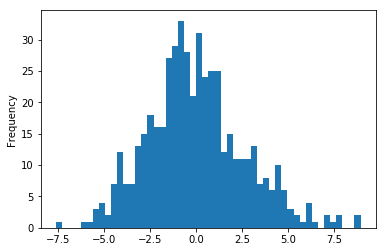

In [18]:
rapm.plot.hist(bins=50)

rapm_HCA = rapm['HCA']
print("Home Court Advantage for Net Rating: {:.2f}".format(rapm_HCA))
print()
print("Top 20 by RAPM\n" + 40*"=")
print(rapm[players].sort_values(ascending=False)[:20].to_string())
print()
print("Bottom 20 by RAPM\n" + 40*"=")
print(rapm[players].sort_values(ascending=True)[:20].to_string())

### How penalizing the coefficients cleans things up

In [19]:
apm["Kosta Koufos"], apm["Marc Gasol"], apm["Zach Randolph"]

(-3.6586029004963838, -5.756523187909683, 1.997198456536166)

In [20]:
rapm["Kosta Koufos"], rapm["Marc Gasol"], rapm["Zach Randolph"]

(2.576941391569771, 1.2791000225734099, 6.1802253956219477)

In [21]:
griz_players = ['Jordan Adams', 'Tony Allen', 'Nick Calathes', 'Vince Carter',
       'Mike Conley', 'Marc Gasol', 'JaMychal Green', 'Jeff Green',
       'Kosta Koufos', 'Courtney Lee', 'Jon Leuer', 'Kalin Lucas',
       'Quincy Pondexter', 'Tayshaun Prince', 'Zach Randolph',
       'Russ Smith', 'Jarnell Stokes', 'Tyrus Thomas', 'Beno Udrih']

In [22]:
apm[griz_players]

Jordan Adams        -7.441164
Tony Allen          -2.854986
Nick Calathes       -4.018557
Vince Carter       -11.983109
Mike Conley        -10.320909
Marc Gasol          -5.756523
JaMychal Green     -14.369896
Jeff Green         -18.321378
Kosta Koufos        -3.658603
Courtney Lee        -9.407771
Jon Leuer          -15.794320
Kalin Lucas        -78.895234
Quincy Pondexter    -8.919124
Tayshaun Prince    -15.254515
Zach Randolph        1.997198
Russ Smith           6.561828
Jarnell Stokes     -17.335247
Tyrus Thomas       -36.637823
Beno Udrih         -13.947333
dtype: float64

In [23]:
rapm[griz_players]

Jordan Adams        0.843452
Tony Allen          5.498612
Nick Calathes       3.064865
Vince Carter       -0.753477
Mike Conley         1.493061
Marc Gasol          1.279100
JaMychal Green     -0.447767
Jeff Green         -4.065667
Kosta Koufos        2.576941
Courtney Lee        0.970357
Jon Leuer          -1.639624
Kalin Lucas        -0.415726
Quincy Pondexter   -0.218636
Tayshaun Prince    -2.939692
Zach Randolph       6.180225
Russ Smith          1.381394
Jarnell Stokes      0.262660
Tyrus Thomas       -0.043536
Beno Udrih         -1.207587
dtype: float64

### Compare to ESPN's RPM

In [24]:
pd.read_html('http://www.espn.com/nba/statistics/rpm/_/year/2015/sort/RPM',
             attrs={'class': 'tablehead'}, header=0, index_col='RK')[0]

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
RK,,,,,,,,
1,"Stephen Curry, PG",GS,80,32.7,7.43,1.91,9.34,20.07
2,"LeBron James, SF",CLE,69,36.1,6.02,2.76,8.78,17.03
3,"James Harden, PG",HOU,81,36.8,8.66,-0.16,8.50,20.63
4,"Anthony Davis, PF",NO,68,36.1,3.98,4.20,8.18,15.86
5,"Kawhi Leonard, SF",SA,64,31.8,2.98,4.59,7.57,12.67
6,"Russell Westbrook, PG",OKC,67,34.4,7.79,-0.71,7.08,14.15
7,"Chris Paul, PG",LAC,82,34.8,6.45,0.47,6.92,16.75
8,"Draymond Green, PF",GS,79,31.5,1.57,5.23,6.80,14.80
9,"DeMarcus Cousins, C",SAC,59,34.1,1.41,4.71,6.12,10.86
